In [40]:
execfile('pysrc/RPC_Hydro.py')

In [2]:
from astropy import units as un

In [3]:
lums = 2.5*u.ld.Lsun * 10.**np.array([12])[:-1]
nSnapshots = 33,135,103,70,1
qs = [pp.Run('B2D_N512_R100_30%dD'%i,nSnapshots[i],r=100.,v0=u.ld.pc/u.ld.yr,L0=u.ld.pc,
           rho0=1e-20,L=lums[i],optFrac=0.514) for i in range(len(lums))]

In [3]:
lums = 2.5*u.ld.Lsun * 10.**np.array([12,9,10,11,13])[:-1]
nSnapshots = 33,135,103,70,1
qs = [pp.Run('B2D_N512_R100_30%dD'%i,nSnapshots[i],r=100.,v0=u.ld.pc/u.ld.yr,L0=u.ld.pc,
           rho0=1e-20,L=lums[i],optFrac=0.514) for i in range(len(lums))]

In [3]:
skewer_dir = dataDir+'skewers/'
min_ir = 100 # required to avoid exceeding cloudy input line maximum
for run in qs:
    for iT in (30,):
        snapshot = run[iT]
        for ix in (10,):
            profile = (log((snapshot.r.cgs()[min_ir:]-snapshot.r.cgs()[min_ir])*un.pc.to('cm')+1e-35),
                   log(snapshot.nH.cgs()[min_ir:,ix]), log(snapshot.T.cgs()[min_ir:,ix]))
            np.savez(skewer_dir+'%s_iT%d_ix%d.npz'%(run.name,iT,ix),
                    log_r=profile[0],log_n=profile[1],log_T=profile[2])


loading snapshot #30
loading snapshot #30
loading snapshot #30
loading snapshot #30


In [40]:
reload(Cloudy); execfile('pysrc/RPC_Hydro.py')
Cloudy.dataDir = skewer_dir

In [41]:
fns = ['%s_iT30_ix10'%run.name for run in qs]
post_grid = Cloudy.Grid('postProcess_300s',emissionLines=Cloudy.emissionLines[:7],
                        profile_fns = fns,strfunc=lambda s: s,colDenss=[22.2],
                  stopT=3000,savelevel=1,ps=[False],dusties=[True],Zs=[1.],aEUVs=[-1.6],
                  luminosities = [log(run.LAGN*(1-run.optFrac)) for run in qs],
                  radii=[log(run.r0) for run in qs],
                       notCartesian='frL')

In [42]:
fns

['B2D_N512_R100_300B_iT30_ix10',
 'B2D_N512_R100_301B_iT30_ix10',
 'B2D_N512_R100_302B_iT30_ix10',
 'B2D_N512_R100_303B_iT30_ix10']

In [12]:
post_grid.writeinputfiles()

In [13]:
post_grid.run()

Grid.run()
module name: my_utils
parent process: 21157
process id: 26989
# of models to run: 4
running: postProcess_300s_L42.7_r20.5B2D_N512_R100_301B_iT30_ix10 process id: 27223
running: postProcess_300s_L43.7_r20.5B2D_N512_R100_302B_iT30_ix10 process id: 27224
running: postProcess_300s_L45.7_r20.5B2D_N512_R100_300B_iT30_ix10 process id: 27226


running: postProcess_300s_L44.7_r20.5B2D_N512_R100_303B_iT30_ix10 process id: 27225
ending: postProcess_300s_L44.7_r20.5B2D_N512_R100_303B_iT30_ix10 process id: 27225
ending: postProcess_300s_L43.7_r20.5B2D_N512_R100_302B_iT30_ix10 process id: 27224
ending: postProcess_300s_L45.7_r20.5B2D_N512_R100_300B_iT30_ix10 process id: 27226
ending: postProcess_300s_L42.7_r20.5B2D_N512_R100_301B_iT30_ix10 process id: 27223


In [20]:
post_grid('CloudyOk')

progress:  100% 0 seconds passed


{(42.66958555783679, 20.489350545218734, 'B2D_N512_R100_301B_iT30_ix10'): True,
 (43.66958555783679, 20.489350545218734, 'B2D_N512_R100_302B_iT30_ix10'): True,
 (44.66958555783679, 20.489350545218734, 'B2D_N512_R100_303B_iT30_ix10'): True,
 (45.66958555783679, 20.489350545218734, 'B2D_N512_R100_300B_iT30_ix10'): True}

In [21]:
post_grid.loadAll()

progress:  100% 3 seconds passed


In [45]:
k = post_grid.keys()[0]
m = post_grid[k]

In [73]:
m.loadAll()

In [74]:
m.linesdicE.keys()

[5006.84, 4861.33, 6583.45, 6730.82, 6716.44, 6562.81, 6300.3]

In [75]:
self = m
log(10.**self.luminosity / (4.*pi*(10.**self.radius)**2 * self.meanhnu(self.aEUV)) )

10.83413253188562

In [119]:
run = qs[1]

In [135]:
q=qs[0]

In [140]:
q[2].NHI.cgs()[:,30]

array([0.00000000e+00, 3.40362974e+06, 7.02841629e+06, 1.07857760e+07,
       1.47065605e+07, 1.88006291e+07, 2.30777020e+07, 2.75405610e+07,
       3.21959072e+07, 3.70512460e+07, 4.21067364e+07, 4.73743222e+07,
       5.28837217e+07, 5.86722051e+07, 6.47723669e+07, 7.12113421e+07,
       7.80084504e+07, 8.51638467e+07, 9.26474906e+07, 1.00430149e+08,
       1.08480115e+08, 1.16762130e+08, 1.25275810e+08, 1.34033106e+08,
       1.43047609e+08, 1.52320729e+08, 1.61866707e+08, 1.71717468e+08,
       1.81910792e+08, 1.92488664e+08, 2.03505694e+08, 2.15029867e+08,
       2.27146391e+08, 2.39961130e+08, 2.53597329e+08, 2.68173302e+08,
       2.83732398e+08, 3.00205624e+08, 3.17559624e+08, 3.35801807e+08,
       3.54969431e+08, 3.75114445e+08, 3.96294535e+08, 4.18575057e+08,
       4.42029878e+08, 4.66741062e+08, 4.92798604e+08, 5.20303262e+08,
       5.49373976e+08, 5.80156075e+08, 6.12826785e+08, 6.47586011e+08,
       6.84666613e+08, 7.24324615e+08, 7.66844698e+08, 8.12529231e+08,
      

(0, 1)

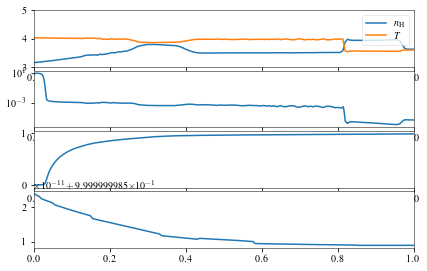

In [109]:
subplot(411)
plot(10.**m.profile[0]/3e18,m.profile[1],label=r'$n_{\rm H}$')
plot(10.**m.profile[0]/3e18,m.profile[2],label=r'$T$')
run = qs[1]
legend()
xlim(0,1)
ylim(3,5)
subplot(412)
semilogy(m.depths/3e18,m.linesdicE[5006.84]/m.linesdicE[4861.33],label=r'[OIII]/Hb')
xlim(0,1)
subplot(413)
plot(m.depths/3e18,m.Nion('HI')/(m.Nion('HII')+m.Nion('HI')))
# semilogy(m.depths/3e18,)
xlim(0,1)
xlabel(r'$\delta r [{\rm pc}]$')
# ylim(1e17,1e20)
subplot(414)
plot(run[30].r.cgs()-100,run[30].fHII.cgs()[:,10])
xlim(0,1)


In [118]:
run[30].fHI.cgs()[:,10].max()

1.4910503942644482e-09

In [101]:
0.025*3e18*1e3

7.5e+19

L=43 OIII/Hb: 0.80 NII/Ha: -0.18 SII/Ha: 0.49 OI/Ha: -0.36
L=44 OIII/Hb: 0.97 NII/Ha: -0.46 SII/Ha: 0.14 OI/Ha: -0.57
L=45 OIII/Hb: 0.76 NII/Ha: -0.55 SII/Ha: -0.09 OI/Ha: -0.64
L=46 OIII/Hb: 0.69 NII/Ha: -0.60 SII/Ha: -0.46 OI/Ha: -0.65


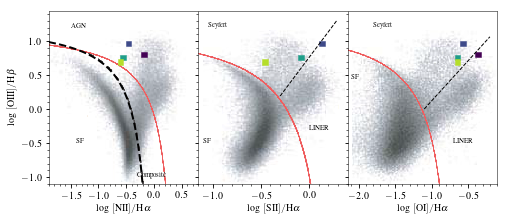

In [37]:
execfile('pysrc/RPC_Hydro.py')
reload(BPT)
BPTplot_byL(post_grid)
savefig('figures/BPT.png',bbox_inches='tight',dpi=600)

* increase columns, OI region extends beyond cloud
* trend in SII is dominated by density effect, not by RPC, how do we avoid density issues?
* change to L=1e44, alpha_EUV = -1.4
* change to Z=2
* probably need to sum different distances at different luminosities
* mark P_rad/P_gas

In [32]:
min_ir = 100 # required to avoid exceeding cloudy input line maximum
profile = (log((snapshot.r.cgs()[min_ir:]-snapshot.r.cgs()[min_ir])*un.pc.to('cm')+1e-35),
           log(snapshot.nH.cgs()[min_ir:,ix]), log(snapshot.T.cgs()[min_ir:,ix]))
post_model = Cloudy.Model('postProcess_model',emissionLines=Cloudy.emissionLines[:7],
                          profileFileName = fns[-1],columndensity=22.2,
                  stopT=3000,savelevel=1,initialPressure=False,dust=True,Z=1.,aEUV=-1.6,
                  luminosity = log(qRP.LAGN*(1-qRP.optFrac)),
                  radius=log(qRP.r0))

In [100]:
post_model.writeInputFile()

In [ ]:
post_model.run()

running: postProcess_model process id: 24086


In [33]:
post_model.CloudyOk()

True

In [34]:
post_model.loadAll()

pysrc/Cloudy.py:1297: RuntimeWarning: divide by zero encountered in log10
  #self.elementStates['H'], self.elementStates['He'] = self.Hstate, self.Hestate


In [89]:
import BPT

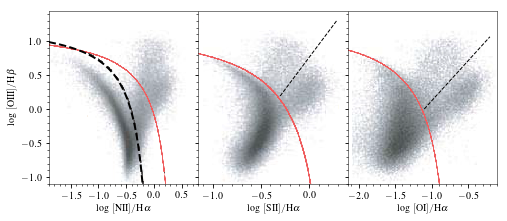

In [96]:
reload(BPT)



In [9]:
hydrostaticGrid = Cloudy.Grid('HSE', 
                                emissionLines=Cloudy.emissionLines[:7],
                                colDenss=[22.2],
                                stopT=3000,savelevel=1,ps=[True],dusties=[True],
                                Zs=[2.],aEUVs=[-1.4],ns=[3.5],
                  luminosities = np.arange(41.7,47)[1:-1],
                  radii=log(np.array([100,1000])*un.pc.to('cm')),forCompatibility='a')

In [38]:
hydrostaticGrid.writeinputfiles()

In [4]:
hydrostaticGrid.keys()

[(-1.4, 42.7, 20.489350545218734),
 (-1.4, 42.7, 21.489350545218734),
 (-1.4, 43.7, 20.489350545218734),
 (-1.4, 43.7, 21.489350545218734),
 (-1.4, 44.7, 20.489350545218734),
 (-1.4, 44.7, 21.489350545218734),
 (-1.4, 45.7, 20.489350545218734),
 (-1.4, 45.7, 21.489350545218734)]

In [41]:
hydrostaticGrid.run(4)

Grid.run()
module name: my_utils
parent process: 55634
process id: 61794
# of models to run: 8
running (18:30:11): HSE_a-1.4_L42.7_r20.5 process id: 68469
running (18:30:11): HSE_a-1.4_L43.7_r21.5 process id: 68472
running (18:30:11): HSE_a-1.4_L42.7_r21.5 process id: 68470
running (18:30:11): HSE_a-1.4_L43.7_r20.5 process id: 68471


ending (18:40:37): HSE_a-1.4_L42.7_r20.5 process id: 68469
running (18:40:37): HSE_a-1.4_L44.7_r20.5 process id: 68851
ending (18:40:44): HSE_a-1.4_L42.7_r21.5 process id: 68470
running (18:40:44): HSE_a-1.4_L44.7_r21.5 process id: 68865
ending (18:40:54): HSE_a-1.4_L43.7_r21.5 process id: 68472
running (18:40:54): HSE_a-1.4_L45.7_r20.5 process id: 68877
ending (18:45:51): HSE_a-1.4_L43.7_r20.5 process id: 68471
running (18:45:51): HSE_a-1.4_L45.7_r21.5 process id: 69014


In [9]:
hydrostaticGrid.loadAll()

progress:  100% 2 seconds passed


L=43 OIII/Hb: 0.59 NII/Ha: 0.34 SII/Ha: 0.26 OI/Ha: -0.84
L=44 OIII/Hb: 1.14 NII/Ha: -0.01 SII/Ha: -0.09 OI/Ha: -0.98
L=45 OIII/Hb: 1.23 NII/Ha: -0.03 SII/Ha: -0.08 OI/Ha: -0.63
L=46 OIII/Hb: 1.16 NII/Ha: -0.08 SII/Ha: -0.45 OI/Ha: -0.41


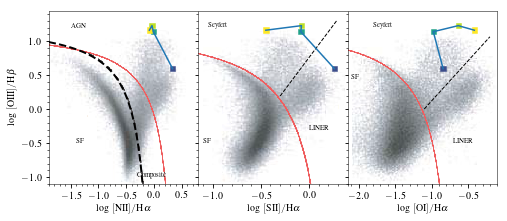

In [31]:
execfile('pysrc/RPC_Hydro.py')
reload(BPT)
BPTplot_byL_HSE(hydrostaticGrid)
savefig('figures/BPT_HSE.png',bbox_inches='tight',dpi=600)

In [3]:
sys.path.append('forCHIMES/')
import parameters as params

In [4]:
RPCGrid = Cloudy.Grid('RPC', 
                        emissionLines=Cloudy.emissionLines[:9] + [Cloudy.emissionLines[16]],
                        colDenss=[23],
                        stopT=3000,savelevel=2,ps=[True],dusties=[True],
                        Zs=[1],aEUVs=[-1.4],ns=[-1.5],
                          luminosities = [log(params.LAGN*params.ion_fraction)],maxIterations=10,
                  radii=[log(params.rAGN)],forCompatibility='ZL')

In [5]:
RPCGrid.keys()

[(1, 45.62582671328571)]

In [6]:
RPCGrid.writeinputfiles()
RPCGrid.run(1)

Grid.run()
module name: my_utils
parent process: 5203
process id: 5358
# of models to run: 1


running (07:46:18): RPC_Z1.0_L45.6 process id: 5482
ending (08:51:28): RPC_Z1.0_L45.6 process id: 5482


In [6]:
m = RPCGrid[(1, 45.62582671328571)]
m.loadAll()
m.loadSpectra(onlyIonizing=True)

pysrc/Cloudy.py:1297: RuntimeWarning: divide by zero encountered in log10
  self.elementStates[elementLetter] = [array([log(x[i]) for x in vals]) for i in range(1,element.nElectrons()+2)]


In [14]:
m.linesdicE.keys()

[3426.0,
 5006.84,
 4861.33,
 6583.45,
 6730.82,
 6716.44,
 6562.81,
 3346.0,
 6300.3,
 3869.0]

In [42]:
sigmas = array([m.sigmaActual(i) for i in rl(m.ddepths)])
taus    = (m.nH*m.ddepths*sigmas).cumsum()
LNeVa   = (m.ddepths*m.linesdicE[3426.0]).cumsum()
LNeIIIb = (m.ddepths*m.linesdicE[3869.0]).cumsum()
LOIIIa = (m.ddepths*m.linesdicE[5006.84]).cumsum()
LHb = (m.ddepths*m.linesdicE[4861.33]).cumsum()
NHIs = m.Nion('HI')
NHs = m.Nion('HI')+m.Nion('HII')
fHIs = 10.**m.elementStates['H'][0]
np.savez('forCHIMES/cloudy_RPC_solution.npz',
         sigmas=sigmas,taus=taus,LNeVa=LNeVa,LNeIIIb=LNeIIIb,LOIIIa=LOIIIa,LHb=LHb,
         nHs=m.nH,Ts=m.Ts,
        nus=m.nus(False),incident_spectrum=m.allSpectra[0],NHIs=NHIs,NHs=NHs,fHIs=fHIs)

(10, 1000000.0)

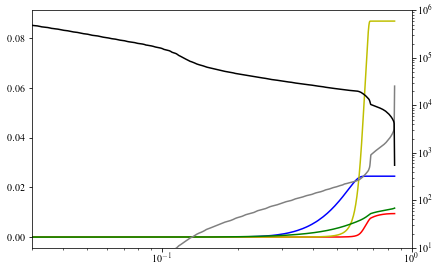

In [16]:
import pylab as pl
pl.semilogx(taus,LNeVa,c='b')
pl.semilogx(taus,LNeIIIb,c='r')
pl.semilogx(taus,LOIII,c='y')
pl.semilogx(taus,LHb,c='g')
pl.xlim(0.03,1)
# pl.ylim(0,10)
pl.twinx()
pl.loglog(taus,m.nH,c='.5')
pl.loglog(taus,m.Ts,c='k')
pl.ylim(10,1e6)